In [1]:
import matplotlib.pyplot as plt
import pandas as pd

Информация по игрокам НХЛ https://www.kaggle.com/martinellis/nhl-game-data?select=player_info.csv

In [9]:
df = pd.read_csv('player_info.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925 entries, 0 to 3924
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_id           3925 non-null   int64  
 1   firstName           3925 non-null   object 
 2   lastName            3925 non-null   object 
 3   nationality         3917 non-null   object 
 4   birthCity           3920 non-null   object 
 5   primaryPosition     3925 non-null   object 
 6   birthDate           3925 non-null   object 
 7   birthStateProvince  2802 non-null   object 
 8   height              3922 non-null   object 
 9   height_cm           3922 non-null   float64
 10  weight              3922 non-null   float64
 11  shootsCatches       3908 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 368.1+ KB


In [11]:
df.head()

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches
0,8466148,Marian,Hossa,SVK,Stará Lubovna,RW,1979-01-12 00:00:00,NaN,"6' 1""",185.42,207.0,L
1,8465058,Michal,Rozsival,CZE,Vlasim,D,1978-09-03 01:00:00,NaN,"6' 1""",185.42,210.0,R
2,8476906,Shayne,Gostisbehere,USA,Pembroke Pines,D,1993-04-20 01:00:00,FL,"5' 11""",180.34,180.0,L
3,8466285,Brian,Campbell,CAN,Strathroy,D,1979-05-23 01:00:00,ON,"5' 10""",177.80,192.0,L
4,8470607,Brent,Seabrook,CAN,Richmond,D,1985-04-20 01:00:00,BC,"6' 3""",190.50,220.0,R


In [39]:
#посчитал сколько представителей игроков от каждой страны
nhl_players = df[['nationality', 'player_id']].groupby('nationality').count().sort_values(by="player_id", ascending=False)
nhl_players

,player_id
nationality,
CAN,1896
USA,907
SWE,280
RUS,210
CZE,201
FIN,184
SVK,76
CHE,39
DEU,31


<AxesSubplot:title={'center':'nhl players by nationality'}, xlabel='nationality', ylabel='number of players'>

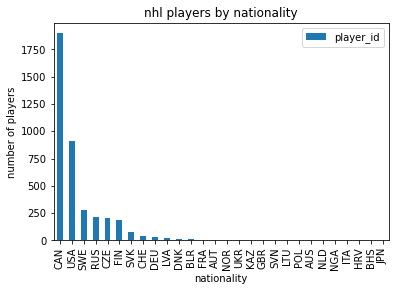

In [40]:
nhl_players.plot(kind='bar', 
                                                                  title='nhl players by nationality',
                                                                  xlabel='nationality',
                                                                  ylabel='number of players')

В лиге преобладают игроки из Канады. Они превышают идущих следом игроков из США примерно в два раза. Количество игроков из США, в свою очередь, превышает примерно в 3 раза количество игроков из Чехии, Финляндии, России и Швеции. Доля остальных стран очень маленькая. 
 Можно сделать вывод, что основными национальностями, участвующих в играх, являются - канадцы, американцы, шведы, русские, чехи и фины. 
 Почему так много канадцев и американцев? Возможно потому что лига находится в Северной Америке и руководство команд, при прочих равных, возьмёт местного игрока. Может быть, количество людей занимающихся хоккеем в Канаде превосходит, занимающихся хоккеем в любой другой стране.

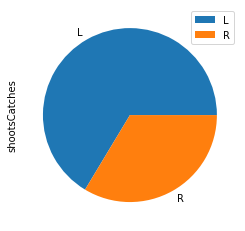

In [24]:
# количество игроков с правым или левым хватом руки
shoots_catches = df.shootsCatches.value_counts().sort_values(ascending = False)
ax = shoots_catches.plot(kind='pie')
ax.legend()

Из круговой диаграммы видно, что игроков с левым хватом руки больше примерно в 1,5 раза. Можно предположить, что если у игрока правый хват клюшки, ему будет проще найти себе команду, т.к. игроков с данным хватом меньше.

<AxesSubplot:title={'center':'distribution of player height'}>

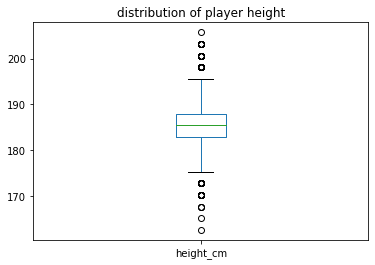

In [42]:
# "ящик с усами" для роста игроков
df.height_cm.plot(kind='box',
                   title='distribution of player height')

Наиболее часто встречаемый рост игроков лежит в пределе от 182 до 187 см. Минимальный рост составляет 175 см, а значения ниже считаются аномалиями. Можно предположить, что игроку ростом меньше 175 см будет тяжело закрепиться в лиге ввиду малых габаритов.

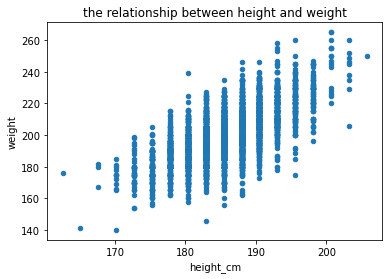

In [28]:
# посмотрим на взимосвязь роста и веса
df.plot(kind='scatter', 
        x='height_cm', 
        y='weight', 
        title='the relationship between height and weight')
plt.show()

Вес и рост связаны прямопропорционально. Что и следовало ожидать. Чем больше рост, тем больше вес. В лиге преобладают игроки больших габаритов. 